## Classification using one vs all approach : (On same data as softmax)

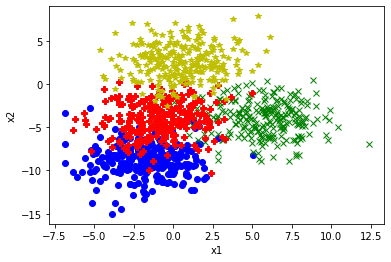

In [1]:
import os
import pandas as pd
# cleaning the data : 
feature = {'x1':[] , 'x2':[] , 'class':[]}
path = os.path.join(os.getcwd(),r'softmax.txt')
ctr = 0
with open(path,'r') as file:
    for i in file:
        if ctr == 3:
            ctr = 0
        if ctr == 0:
            feature['x1'].append(float(i))
        elif ctr == 1:
            feature['x2'].append(float(i))
        else:
            feature['class'].append(float(i))
        ctr += 1
#print(feature)

df = pd.DataFrame(feature)
import numpy as np
pos0 = np.array(df[df['class'] == 0])
pos1 = np.array(df[df['class'] == 1])
pos2 = np.array(df[df['class'] == 2])
pos3 = np.array(df[df['class'] == 3])

import matplotlib.pyplot as plt
plt.plot(pos0[:,0],pos0[:,1],'bo')
plt.plot(pos1[:,0],pos1[:,1],'gx')
plt.plot(pos2[:,0],pos2[:,1],'rP')
plt.plot(pos3[:,0],pos3[:,1],'y*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [3]:
# making input data :
data = np.array(df)
X = np.array([data[:,0],data[:,1]]) # first row is x1 and second x2
Y = np.zeros((4,X.shape[1]))
data_class = (data[:,2])
for i in range(X.shape[1]):
    arr = Y[:,i]
    arr[int(data_class[i])] = 1
    Y[:,i] = arr
print(X.shape,Y.shape)

(2, 1022) (4, 1022)


In [4]:
def sigmoid(z):
    exps = 1/(1 + np.exp(-z))
    return exps #/ np.sum(exps,axis=0,keepdims = True)
def tan(x) :
    return np.tanh(x)

In [6]:
# Just one layer for softmax since 4 classes we have 4 neurons : 
def One_V_All(X,Y,num_iter=1000, lr = 0.0001 ):
    x = X
    y = Y
    m = Y.shape[1]
    w_ = np.random.rand(10,X.shape[0])*0.01 # 10 neurons in layer #1
    w = np.random.rand(4,10)*0.01           # 4 neurons, this is w.T in both cases
    b_ = np.zeros((10,1)) # bias for each neuron
    b = np.zeros((4,1))   # same !

    dj = []
    for i in range(num_iter + 1):
        z_ = np.dot(w_,x) + b_
        a = tan(z_)
        z = np.dot(w,a) + b
        h_theta = sigmoid(z)
        cost = (-1/(m)) * np.sum(np.multiply(Y,np.log(h_theta)))
        dj.append(cost)
        
        dz = h_theta - y
        dw = (1/m) * np.dot(a,dz.T)
        db = (1/m) * np.sum(dz,axis = 1 , keepdims = True)
        
        
        dz_ = np.multiply(np.dot(w.T,dz) , (1 - np.power(a,2)))
        dw_ = (1/m) * np.dot(x,dz_.T)
        db_ = (1/m) * np.sum(dz_,axis = 1 , keepdims = True)
        w = w - lr*dw.T
        b = b - lr*db
        w_ = w_ - lr*dw_.T
        b_ = b_ - lr*db_
        if i % 100 == 0:
            print('cost after',i,'th iteration :',cost)
            #print(db.shape)
    return w,b,w_,b_,dj

In [7]:
w,b,w_,b_,dj = One_V_All(X,Y,1000,1)

cost after 0 th iteration : 0.6933914229868475
cost after 100 th iteration : 0.33181484212424694
cost after 200 th iteration : 0.3427404603765986
cost after 300 th iteration : 0.3194468078725417
cost after 400 th iteration : 0.3731013530313718
cost after 500 th iteration : 0.3120351961833671
cost after 600 th iteration : 0.3052757638612887
cost after 700 th iteration : 0.28679373717637324
cost after 800 th iteration : 0.276889496710883
cost after 900 th iteration : 0.27059203110389485
cost after 1000 th iteration : 0.2649390242519854


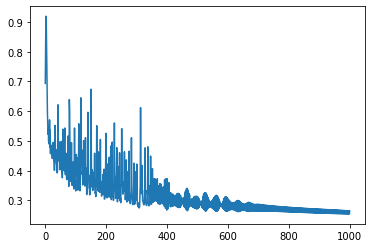

In [8]:
plt.plot(range(1001),dj)
# plot of cost and number of iterations 

In [10]:
def forward_pass(X,w,b,w_,b_):
    z1 = np.dot(w_,X) + b_
    a1 = tan(z1)
    z2 = np.dot(w,a1) + b
    a2 = sigmoid(z2)
    return a2
# computing our accuracy on training set : 
print(np.mean(np.round(forward_pass(X,w,b,w_,b_)) == Y)*100,'% accuracy on training data')
## This accuracy is just one percent less than Softmax approach 

94.74070450097848 % accuracy on training data


### Remember that One vs All approach doesn't work well with high number of outputs to classifiy !!

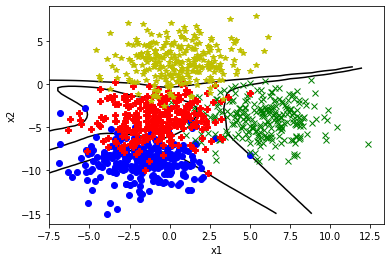

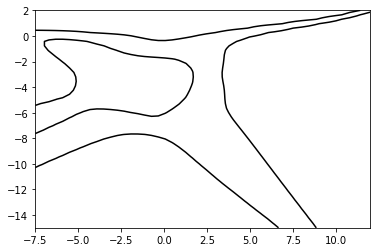

In [11]:
# decision plot for the same  : 
def decision_plot(w,b,w_,b_,k):
    u_vals = np.linspace(-7.5,12,50)
    v_vals= np.linspace(-15,2,50)
    z = np.zeros((len(u_vals),len(v_vals)))
    for i in range(len(u_vals)):
        for j in range(len(v_vals)):
            a = np.array([[u_vals[i]],[v_vals[j]]])
            val = forward_pass(a,w,b,w_,b_)
            z[i,j] = val[k]    
    plt.contour(u_vals,v_vals,z.T,0,colors = ['black'])

for i in range(4):
    decision_plot(w,b,w_,b_,i)
    
plt.plot(pos0[:,0],pos0[:,1],'bo')
plt.plot(pos1[:,0],pos1[:,1],'gx')
plt.plot(pos2[:,0],pos2[:,1],'rP')
plt.plot(pos3[:,0],pos3[:,1],'y*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.figure()
for i in range(4):
    decision_plot(w,b,w_,b_,i)

## With only 4 classes we see it classifies data pretty well and accurate !!

### But remember with more classes it would become trouble some so softmax turns out to be best in those cases so try using softmax instead of this approach.  Also in this approach each neuron acts as a classifier for it's own class and results of softmax i.e. all probability adds up to 1 is true.